In [24]:
from lightgbm import LGBMClassifier,plot_importance
import matplotlib.pyplot as plt
import pandas as pd
from fractions import Fraction
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
from sklearn.metrics import confusion_matrix

import numpy as np

#data = pd.read_csv('predictR2.csv')
#data = pd.read_csv('predictHA.csv')
#data=pd.read_csv('epl4avg.csv')  
#data=pd.read_csv('epl18195avg.csv')
#data=pd.read_csv('epl18194avg.csv')
#data=pd.read_csv('epl18193avg.csv')
#data=pd.read_csv('epl18196avg.csv')
#data=pd.read_csv('epl3avg.csv')
#data=pd.read_csv('epl6avg.csv')
#data=pd.read_csv('predictRAVG2.csv')
#data=pd.read_csv('eplpredictR4HD.csv')

#data=pd.read_csv('epl10154avg.csv')

data=pd.read_csv('epl15204avg.csv')
#data=pd.read_csv('epl14204avg.csv')
#data=pd.read_csv('epl13204avg.csv')
#data=pd.read_csv('epl12204avg.csv')
#data=pd.read_csv('epl11204avg.csv')
df = data[["AvgAGA","AvgHGA","AvgHGF","AvgAGF","HGA","AGA","HGF","AGF","season","round","Date","HT","AT","HomeS","AwayS","result","HTHG","HTAG","HTR","HPL","HRD","HRW","APL","ARD","ARW","HSHOT","ASHOT","B365H","B365D","B365A"]]
#df=data[["HGF","HGA","AGF","AGA","B365H","B365A","HSHOT","ASHOT","result"]]
#X=df[['HGF','HGA','AGF','AGA','HPL','HRD','HRW','APL','ARD','ARW','B365H','B365D','B365A','HSHOT','ASHOT']]
#X=df[['AvgAGA','AvgHGA','AvgHGF','AvgAGF','HGA','AGA','HGF','AGF','HPL','HRD','HRW','APL','ARD','ARW','B365H','B365A','HSHOT','ASHOT']]
#'HPL','HRD','HRW','APL','ARD','ARW'  >>제외시 학습율 0.2 최대 0.5756 
#X=df[['HPL','HRD','HRW','APL','ARD','ARW']]
#X=df[['HGF','HGA','AGF','AGA','HSHOT','ASHOT','HPL','HRD','HRW','APL','ARD','ARW']]


#X=df[['AvgAGA','AvgHGA','AvgHGF','B365H','B365A','HSHOT','ASHOT','HPL','HRD','HRW','APL','ARD','ARW']]
#X=df[['HGF','HGA','AGF','AGA']]
#X=df[['HGF','HGA','AGF','AGA','B365H','B365A','HSHOT','ASHOT','HPL','HRD','HRW','APL','ARD','ARW']]
#X=df[['B365H','B365A','HSHOT','ASHOT','HPL','HRD','HRW','APL','ARD','ARW']]
X=df[['AvgAGA','AvgHGA','AvgHGF','AvgAGF','HGF','HGA','AGF','AGA','B365H','B365A','HSHOT','ASHOT','HPL','HRD','HRW','APL','ARD','ARW']] #0.5839
y=df[['result']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [18]:
lgb=LGBMClassifier(n_estimators=400, learning_rate=0.15,max_depth=4 )
#learning_rate=0.1, 0.5673 , 0.01=0.5776  , 0.05=0.5797  ,0.15=0.5839  ,0.2=0.5797
evals=[(X_test,y_test)]
lgb.fit(X_train,y_train, early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)

lgb_pred=lgb.predict(X_test)




[1]	valid_0's multi_logloss: 1.01351
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.994541
[3]	valid_0's multi_logloss: 0.979949
[4]	valid_0's multi_logloss: 0.970036
[5]	valid_0's multi_logloss: 0.961774
[6]	valid_0's multi_logloss: 0.956559
[7]	valid_0's multi_logloss: 0.952659
[8]	valid_0's multi_logloss: 0.949076
[9]	valid_0's multi_logloss: 0.947225
[10]	valid_0's multi_logloss: 0.94563
[11]	valid_0's multi_logloss: 0.946776
[12]	valid_0's multi_logloss: 0.94608
[13]	valid_0's multi_logloss: 0.947281
[14]	valid_0's multi_logloss: 0.948403
[15]	valid_0's multi_logloss: 0.95036
[16]	valid_0's multi_logloss: 0.95169
[17]	valid_0's multi_logloss: 0.95265
[18]	valid_0's multi_logloss: 0.954216
[19]	valid_0's multi_logloss: 0.956241
[20]	valid_0's multi_logloss: 0.957026
[21]	valid_0's multi_logloss: 0.958254
[22]	valid_0's multi_logloss: 0.960267
[23]	valid_0's multi_logloss: 0.961555
[24]	valid_0's multi_logloss: 0.96276
[25]	valid_0's mul

In [19]:
def get_clf_eval(y_test,y_pred):
    confusion=confusion_matrix(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred, average=None)
    recall=recall_score(y_test,y_pred,average='weighted')
    #F1=f1_score(y_test,y_pred,average='weighted')
    #AUC=roc_auc_score(y_test,y_pred,average='weighted')
    
    print('오차행렬:\n',confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    #print('f1: {:.4f}'.format(F1))
    #print('AUC: {:.4f}'.format(AUC))
get_clf_eval(y_test,lgb_pred)

오차행렬:
 [[ 70   0  61]
 [ 28   5  75]
 [ 33   4 207]]

정확도: 0.5839


TypeError: unsupported format string passed to numpy.ndarray.__format__

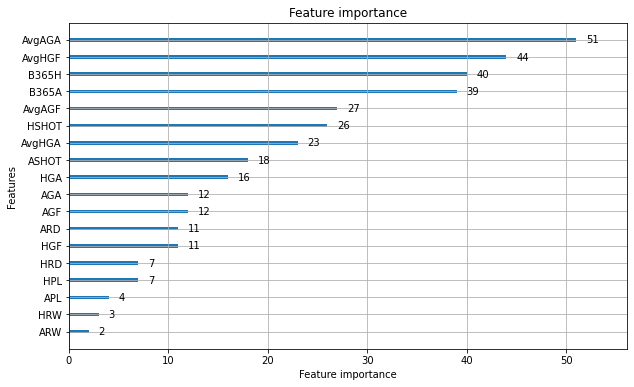

In [20]:

fig,ax=plt.subplots(figsize=(10,6))
plot_importance(lgb,ax=ax)

In [115]:
lgb.booster_.save_model('LastModel.csv')
#load from model:

#bst = lgb.booster(model_file='mode.txt')

In [21]:
#from sklearn.externals import joblib
import joblib

joblib.dump(lgb,'LastModel.pkl')

['LastModel.pkl']

In [140]:
obj=joblib.load('LastModel.pkl')

In [25]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb=XGBClassifier()

xgb_param_grid={
    
    'n_estimators':[100,200,400,600],
    'learining_rate':[0.01,0.05,0.1,0.15,0.2],
    'max_depth':[4,6,8,10,12],
}

xgb_grid=GridSearchCV(xgb, param_grid=xgb_param_grid,scoring="accuracy",n_jobs=-1,verbose=1)


xgb_grid.fit(X_train,y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min


In [124]:
print("최고 평균 정확도 : {0:.4f}".format(xgb_grid.best_score_))
print("최고 파라미터 : ", xgb_grid.best_params_)

최고 평균 정확도 : 0.5225
최고 파라미터 :  {'learining_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


In [125]:
cv_result_df=pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'],inplace=True)

In [126]:
cv_result_df[['params','mean_test_score','rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
0,"{'learining_rate': 0.01, 'max_depth': 4, 'n_es...",0.522530,1
60,"{'learining_rate': 0.15, 'max_depth': 4, 'n_es...",0.522530,1
20,"{'learining_rate': 0.05, 'max_depth': 4, 'n_es...",0.522530,1
40,"{'learining_rate': 0.1, 'max_depth': 4, 'n_est...",0.522530,1
80,"{'learining_rate': 0.2, 'max_depth': 4, 'n_est...",0.522530,1
30,"{'learining_rate': 0.05, 'max_depth': 8, 'n_es...",0.519368,6
50,"{'learining_rate': 0.1, 'max_depth': 8, 'n_est...",0.519368,6
10,"{'learining_rate': 0.01, 'max_depth': 8, 'n_es...",0.519368,6
70,"{'learining_rate': 0.15, 'max_depth': 8, 'n_es...",0.519368,6
90,"{'learining_rate': 0.2, 'max_depth': 8, 'n_est...",0.519368,6


In [71]:
xgb=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
evals=[(X_test,y_test)]
xgb.fit(X_train,y_train, early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=1)



E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBoostError: [16:51:19] src/metric/elementwise_metric.cu:326: Check failed: preds.Size() == info.labels_.Size() (1629 vs. 543) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification

XGBoostError: need to call fit or load_model beforehand

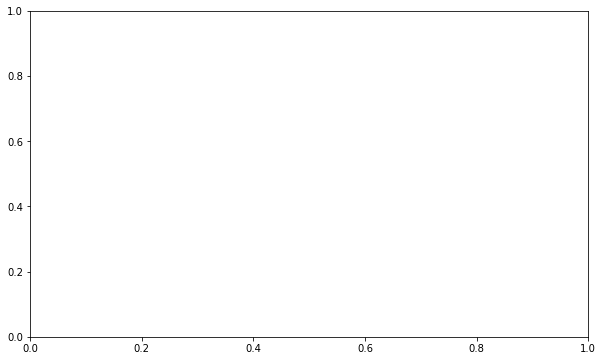

In [128]:
fig,ax=plt.subplots(figsize=(10,6))
plot_importance(xgb, ax=ax)